In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("E:/DataScience/Data/Loan Prediction/train.csv") #Reading the dataset in a dataframe using Pandas

In [7]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df.shape

(614, 13)

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [14]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
#Distribution Analysis

In [145]:
df['ApplicantIncome'].hist(bins=50)

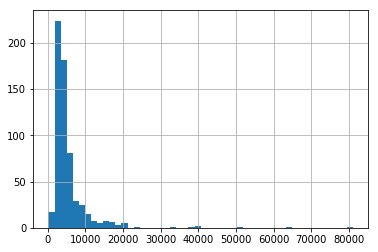

In [147]:
plt.show()numpy.corrcoef

In [24]:
df.boxplot(column = 'ApplicantIncome')

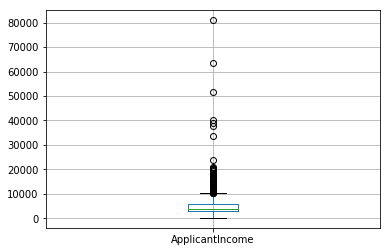

In [25]:
plt.pyplot.show()

In [26]:
df.boxplot(column = 'ApplicantIncome', by = 'Education')

C:\Users\swathi08\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


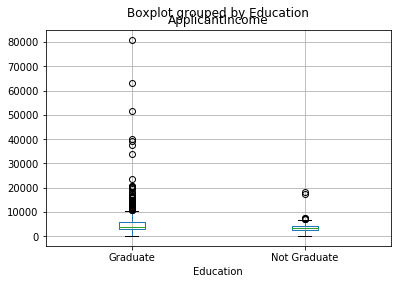

In [27]:
plt.pyplot.show()

In [28]:
df.boxplot(column = 'ApplicantIncome', by = 'Gender')

C:\Users\swathi08\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


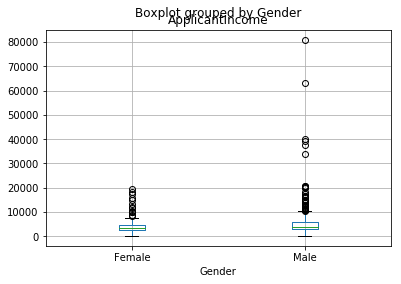

In [29]:
plt.pyplot.show()

In [30]:
df['LoanAmount'].hist(bins=50)

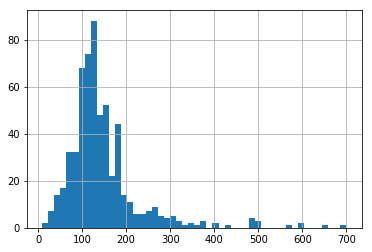

In [32]:
plt.pyplot.show()

In [33]:
df.boxplot(column='LoanAmount')

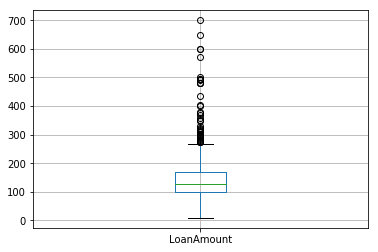

In [34]:
plt.pyplot.show()

In [35]:
temp1 = df['Credit_History'].value_counts()

In [36]:
temp1

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
temp1 = df['Credit_History'].value_counts(ascending=True)

In [38]:
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [39]:
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [40]:
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

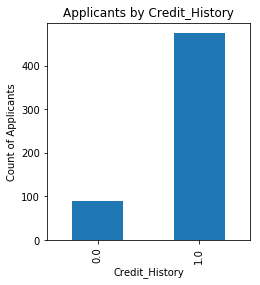

In [44]:
plt.show()

In [45]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

Text(0.5,1,'Probability of getting loan by credit history')

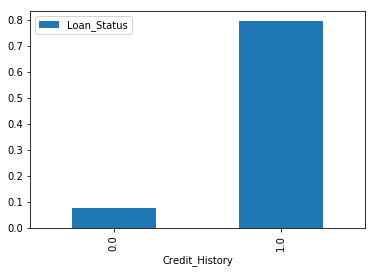

In [46]:
plt.show()

In [47]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','green'], grid=False)

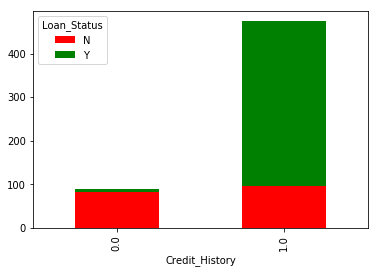

In [48]:
plt.show()

In [51]:
#check missing values
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [56]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
df['Self_Employed'].fillna('No', inplace=True)

In [58]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
# treat extreme values

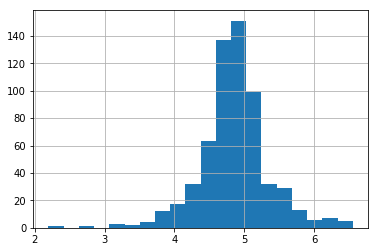

In [60]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
plt.show()

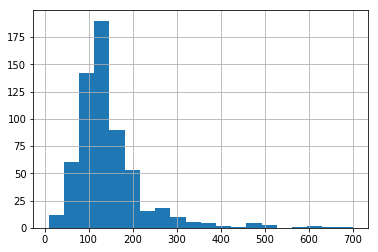

In [61]:
df['LoanAmount'].hist(bins=20)
plt.show()

In [62]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [64]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])

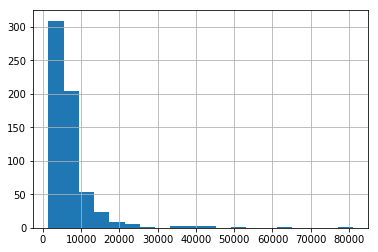

In [65]:
df['TotalIncome'].hist(bins=20)
plt.show()

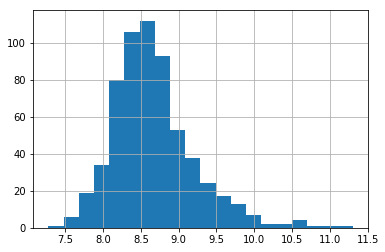

In [66]:
df['TotalIncome_log'].hist(bins=20)
plt.show()

In [67]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [70]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [71]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [72]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [73]:
#imputing credit history with 1 as it has more values

In [74]:
df['Credit_History'].fillna(1, inplace=True)

In [88]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
Payback              0
dtype: int64

In [76]:
df['Payback'] = df['LoanAmount']/df['TotalIncome'] 

In [77]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Payback
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026,0.025032
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,0.023500
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872,0.027775
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569,0.024682
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750,0.028520
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305,0.030369
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819,0.014658


In [78]:
# label encoding categorical variables to use for sklearn library

In [81]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
Payback              float64
dtype: object

In [83]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [84]:
# imputing gender with 'Male'
df['Gender'].fillna('Male', inplace=True)

In [86]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [122]:
# imputing dependents with '0'
df['Dependents'].fillna('0', inplace=True)

In [109]:
# removing the values with empty values 
df1 = df.loc[df['Married'].notnull()]

In [131]:
#label encoding to convert categorical variables to int to process with sklearn
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df1[i] = le.fit_transform(df1[i])
df1.dtypes

C:\Users\swathi08\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
Payback              float64
dtype: object

In [132]:
df1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Payback
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026,0.025032
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568,0.021015
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368,0.022000
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323,0.024287
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515,0.023500
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1,5.587249,9613.0,9.170872,0.027775
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1,4.553877,3849.0,8.255569,0.024682
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0,5.062595,5540.0,8.619750,0.028520
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1,5.123964,5532.0,8.618305,0.030369
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0,5.855072,23809.0,10.077819,0.014658


In [142]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

C:\Users\swathi08\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [150]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Payback
Gender,1.000000,0.367926,0.172422,0.044560,-0.001284,0.061997,0.082028,0.108139,-0.081706,0.010004,-0.026958,0.019381,0.145238,0.095791,0.172247,-0.107323
Married,0.367926,1.000000,0.337748,0.014223,0.005904,0.051332,0.077770,0.146981,-0.102600,0.009481,0.002918,0.089280,0.179178,0.083776,0.151668,-0.016513
Dependents,0.172422,0.337748,1.000000,0.053947,0.055471,0.118901,0.028788,0.163693,-0.100767,-0.038736,0.001121,0.012593,0.157964,0.125490,0.113312,0.059590
Education,0.044560,0.014223,0.053947,1.000000,-0.011414,-0.140590,-0.063585,-0.166859,-0.077021,-0.072670,-0.064391,-0.084286,-0.142575,-0.161765,-0.205063,0.082658
Self_Employed,-0.001284,0.005904,0.055471,-0.011414,1.000000,0.127550,-0.017019,0.115501,-0.033614,-0.000757,-0.030184,-0.002404,0.110405,0.112919,0.177089,-0.069384
ApplicantIncome,0.061997,0.051332,0.118901,-0.140590,0.127550,1.000000,-0.116266,0.566037,-0.043066,-0.018900,-0.008948,-0.005154,0.435168,0.893069,0.717502,-0.312072
CoapplicantIncome,0.082028,0.077770,0.028788,-0.063585,-0.017019,-0.116266,1.000000,0.188147,-0.059415,0.012093,0.011051,-0.057733,0.205169,0.343035,0.384824,-0.199788
LoanAmount,0.108139,0.146981,0.163693,-0.166859,0.115501,0.566037,0.188147,1.000000,0.038472,-0.001633,-0.045145,-0.036789,0.895453,0.620551,0.688528,0.151620
Loan_Amount_Term,-0.081706,-0.102600,-0.100767,-0.077021,-0.033614,-0.043066,-0.059415,0.038472,1.000000,-0.000135,-0.078696,-0.022055,0.086103,-0.067644,-0.051595,0.157872
Credit_History,0.010004,0.009481,-0.038736,-0.072670,-0.000757,-0.018900,0.012093,-0.001633,-0.000135,1.000000,0.001205,0.540021,-0.020288,-0.012396,0.020696,-0.038848


In [171]:
df1.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540021
Married              0.089280
Property_Area        0.030939
Gender               0.019381
Dependents           0.012593
TotalIncome_log      0.007050
Self_Employed       -0.002404
ApplicantIncome     -0.005154
Loan_Amount_Term    -0.022055
TotalIncome         -0.031027
LoanAmount          -0.036789
LoanAmount_log      -0.043133
CoapplicantIncome   -0.057733
Education           -0.084286
Payback             -0.093346
Name: Loan_Status, dtype: float64

In [160]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.852%


In [162]:
predictor_var = ['Credit_History','Married', 'Education', 'CoapplicantIncome', 'Payback', 'LoanAmount_log']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 81.178%
Cross-Validation Score : 80.852%


In [164]:
predictor_var = ['Credit_History', 'Payback']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.852%


In [173]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History', 'Married', 'Payback', 'Education']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.852%


In [165]:
# To improve accuracy, using decision tree algorithm

In [166]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.852%


In [167]:
predictor_var = ['Credit_History', 'LoanAmount_log']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 86.907%
Cross-Validation Score : 69.888%


In [168]:
predictor_var = ['Credit_History', 'CoapplicantIncome']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 88.543%
Cross-Validation Score : 76.431%


In [169]:
predictor_var = ['Credit_History', 'CoapplicantIncome', 'Married', 'Education']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 89.198%
Cross-Validation Score : 74.462%


In [170]:
predictor_var = ['Credit_History', 'CoapplicantIncome', 'Education']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 88.543%
Cross-Validation Score : 75.447%


In [174]:
#Random Forest

In [180]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Payback']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 75.608%


In [181]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Payback             0.459311
Credit_History      0.271183
Dependents          0.062929
Property_Area       0.055013
Loan_Amount_Term    0.049691
Education           0.028529
Self_Employed       0.025225
Gender              0.024366
Married             0.023753
dtype: float64


In [195]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Payback','Credit_History','Dependents','Property_Area' , 'Education']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 82.815%
Cross-Validation Score : 80.361%


In [184]:
df1['Payback_log'] = np.log(df1['Payback'])

C:\Users\swathi08\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [185]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Payback_log']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 74.629%


In [186]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Payback_log       0.512287
Credit_History    0.271777
Property_Area     0.063157
Dependents        0.062491
Gender            0.022961
Education         0.022917
Married           0.022817
Self_Employed     0.021592
dtype: float64


In [210]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Payback_log', 'Credit_History', 'Property_Area', 'Dependents' , 'Education']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 82.488%
Cross-Validation Score : 81.017%
